In [ ]:
import pandas as pd
df = pd.read_excel('/content/sample_data/Cleaned_DF.xlsx')
df.head()

,Log Date,site Name,Turbine Code,Cluster Name,Gen.Units,AVG WindSpd,WTG Fault,PM ShutDown,MMA,Grid Availability,...,COLORCODE2,STATUSMSG3,COLORCODE3,month_year,custom_sort,Total_Fault,days_in_month,error_count,month,year
0,2020-04-01,AgadGaon,TPCAG-01,1-Agadgaon,983,3.9,0.0,0.0,100.0,92.080002,...,NaN,NaN,NaN,Apr-2020,202004,0.0,30,0,4,2020
1,2020-04-01,AgadGaon,TPCAG-02,1-Agadgaon,813,3.8,0.0,0.0,100.0,92.080002,...,NaN,NaN,NaN,Apr-2020,202004,0.0,30,0,4,2020
2,2020-04-01,AgadGaon,TPCAG-03,1-Agadgaon,1368,4.2,0.0,0.0,100.0,92.849998,...,NaN,NaN,NaN,Apr-2020,202004,0.0,30,0,4,2020
3,2020-04-01,AgadGaon,TPCAG-04,1-Agadgaon,1406,4.1,0.0,0.0,100.0,92.849998,...,NaN,NaN,NaN,Apr-2020,202004,0.0,30,0,4,2020
4,2020-04-01,AgadGaon,TPCAG-05,1-Agadgaon,1754,3.8,0.0,0.0,100.0,100.000000,...,NaN,NaN,NaN,Apr-2020,202004,0.0,30,0,4,2020


In [ ]:
df.columns

Index(['Log Date', 'site Name', 'Turbine Code', 'Cluster Name', 'Gen.Units',
       'AVG WindSpd', 'WTG Fault', 'PM ShutDown', 'MMA', 'Grid Availability',
       'Capacity Factor', 'Remarks', 'Error Code1', 'Error Code2',
       'Error Code3', 'STATUSMSG1', 'COLORCODE1', 'STATUSMSG2', 'COLORCODE2',
       'STATUSMSG3', 'COLORCODE3', 'month_year', 'custom_sort', 'Total_Fault',
       'days_in_month', 'error_count', 'month', 'year'],
      dtype='object')

In [ ]:
new_df = df[['Log Date','Gen.Units',
       'AVG WindSpd', 'WTG Fault', 'PM ShutDown', 'MMA', 'Grid Availability',
       'Capacity Factor']]
new_df.head()

,Log Date,Gen.Units,AVG WindSpd,WTG Fault,PM ShutDown,MMA,Grid Availability,Capacity Factor
0,2020-04-01,983,3.9,0.0,0.0,100.0,92.080002,5.12
1,2020-04-01,813,3.8,0.0,0.0,100.0,92.080002,4.23
2,2020-04-01,1368,4.2,0.0,0.0,100.0,92.849998,7.13
3,2020-04-01,1406,4.1,0.0,0.0,100.0,92.849998,7.32
4,2020-04-01,1754,3.8,0.0,0.0,100.0,100.000000,9.14


In [ ]:
# Group by 'Date' and aggregate
grouped_df = new_df.groupby('Log Date').agg({
    'Gen.Units': 'sum',       # Sum of Sales for each date
    'AVG WindSpd': 'mean',
    'WTG Fault': 'sum',
    'PM ShutDown': 'sum',
    'MMA': 'mean',
    'Grid Availability': 'mean',
    'Capacity Factor': 'mean'
    # Mean of Quantity for each date
}).reset_index()
grouped_df.head()

,Log Date,Gen.Units,AVG WindSpd,WTG Fault,PM ShutDown,MMA,Grid Availability,Capacity Factor
0,2020-04-01,107889,3.858730,0.350000,0.0,99.976825,98.692698,8.920159
1,2020-04-02,127978,4.425397,7.883333,0.0,99.478571,99.456825,10.580318
2,2020-04-03,137558,4.720635,6.283333,0.0,99.584603,100.000000,11.372540
3,2020-04-04,128363,4.417460,5.333333,0.0,99.647143,100.000000,10.612381
4,2020-04-05,184724,5.073016,4.600000,0.0,99.695873,94.865079,15.271429


In [ ]:
grouped_df.shape

(1545, 8)

In [ ]:
len(grouped_df)

1545

Finding Out the Autocorrelation : Measures the correlation between a time series and a lagged version of itself over a successive time interval.

In [ ]:
# Set 'Date' as the index
grouped_df.set_index('Log Date', inplace=True)
grouped_df

,Gen.Units,AVG WindSpd,WTG Fault,PM ShutDown,MMA,Grid Availability,Capacity Factor
Log Date,,,,,,,
2020-04-01,107889,3.858730,0.350000,0.00,99.976825,98.692698,8.920159
2020-04-02,127978,4.425397,7.883333,0.00,99.478571,99.456825,10.580318
2020-04-03,137558,4.720635,6.283333,0.00,99.584603,100.000000,11.372540
2020-04-04,128363,4.417460,5.333333,0.00,99.647143,100.000000,10.612381
2020-04-05,184724,5.073016,4.600000,0.00,99.695873,94.865079,15.271429
...,...,...,...,...,...,...,...
2024-06-19,560723,7.858730,9.783333,0.00,99.353174,96.827938,46.356825
2024-06-20,656276,8.353968,13.283333,0.00,99.121746,100.000000,54.255873
2024-06-21,549766,7.838095,16.700000,0.00,98.895556,95.757936,45.450476


In [ ]:
#auto correlationof lag 1
autocorr_lag1 = grouped_df['Gen.Units'].autocorr(lag=1)
print("Autocorrelation of Gen.Units with lag 1:", autocorr_lag1)

Autocorrelation of Gen.Units with lag 1: 0.8338867503600538


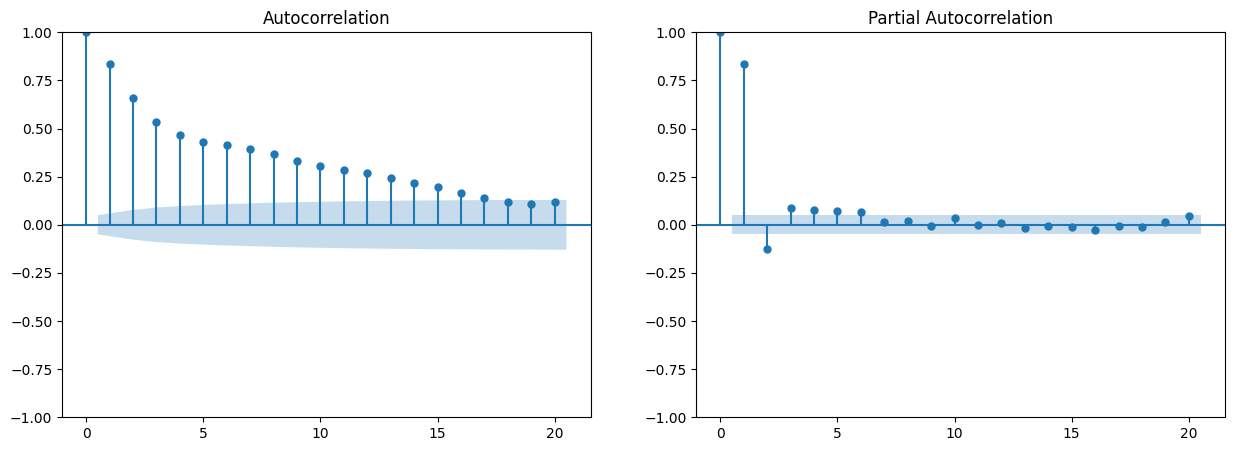

In [ ]:
#Plotting ACF and PACF Plots.
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
# Plotting ACF and PACF
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plot_acf(grouped_df['Gen.Units'], lags=20, ax=ax[0])
plot_pacf(grouped_df['Gen.Units'], lags=20, ax=ax[1])
plt.show()

Understanding Autocorrelation Value
Autocorrelation (ACF): Measures how similar a time series is to a lagged version of itself. Values range from -1 to 1:
1: Perfect positive correlation.
0: No correlation.
-1: Perfect negative correlation

Here the autocorrelation of 0.83 indicates a strong positive relationship between the values of the time series at the current time stamp and their values at the specified lags.

High autocorrelation implies that past values of the series can be good predictors of future values.

Trend or Seasonality:

Such a high autocorrelation value can be indicative of a trend or seasonal pattern in the data. For instance:
Trend: A persistent increase or decrease over time.
Seasonality: Regular fluctuations at consistent intervals (e.g., daily, weekly, monthly).

High autocorrelation at lag 1 (first order) might suggest using an AR(1) model (AutoRegressive model of order 1).

Identifing the AR Model:
AR(p) Process: The PACF is particularly useful for identifying the order 𝑝
p of an AutoRegressive (AR) process. In an AR process, the PACF will show significant spikes at the first 𝑝
p lags and cut off (drop close to zero) after lag 𝑝
For example:
AR(1): The PACF has a significant spike at lag 1 and drops to near zero for subsequent lags.
AR(2): Significant spikes at lags 1 and 2, with near-zero values thereafter.
Identifying 𝑝
p: The lag at which the PACF cuts off (the last significant spike) suggests the order of the AR process.

Randomness: A flat PACF suggests a lack of significant autocorrelation, implying randomness.

How to Check stationarity and non stationarity of a data based on ACF and PACF Plot.:

Stationary Time Series:

ACF Plot: The autocorrelations decline quickly and become insignificant after a few lags. This rapid decay indicates no long-term dependencies, typical of stationary series.

PACF Plot: The PACF shows significant values only at the first few lags and then drops to near zero, confirming that the series is only correlated with its recent past values.


Non-Stationary Time Series:

ACF Plot: The autocorrelations decay slowly and remain significant for many lags. This slow decay suggests persistent dependencies and is characteristic of non-stationary series.

PACF Plot: The PACF may show significant values at many lags without a quick drop-off, indicating long-term dependencies and trends typical in non-stationary data.

A large PACF value at lag 1 with subsequent values not dropping quickly may indicate a trend or non-stationarity.


Augmented Dickey Fuller test used to check the stationarity of a data:

adfuller(data_series): This function from statsmodels.tsa.stattools performs the ADF test on the provided data_series.

result[0]: This is the ADF statistic.

result[1]: This is the p-value of the test. You compare this against a significance level (like 0.05) to determine if the series is stationary.

result[4]: This is a dictionary containing critical values for the test statistic at the 1%, 5%, and 10% levels.

Interpretation:
ADF Statistic: If it is less than the critical values, you can reject the null hypothesis (series is non-stationary).

p-value: If it is less than a significance level (e.g., 0.05), you can reject the null hypothesis (series is non-stationary).P-value is less than 0.05 means the series is stationary

Critical Values: Compare the ADF statistic to these critical values to make your determination.


In [ ]:
from statsmodels.tsa.stattools import adfuller
# Assuming 'your_column' is the name of the column you want to test
column_name = 'Gen.Units'

# Extract the column as a series
data_series = grouped_df[column_name]

# Perform the ADF test
result = adfuller(data_series)

# Extract and print out the results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')
if result[0] < result[4]['5%']:
    print("Reject the null hypothesis. Series is stationary.")
else:
    print("Fail to reject the null hypothesis. Series is non-stationary.")

ADF Statistic: -8.205281624008213
p-value: 7.051885799739683e-13
Critical Values:
	1%: -3.4346061667443037
	5%: -2.8634198362847085
	10%: -2.5677707961086265
Reject the null hypothesis. Series is stationary.


In [ ]:
# Function to check stationarity
from statsmodels.tsa.stattools import adfuller
def check_stationarity(column):
    result = adfuller(column)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
    if result[1] <= 0.05:
        print("Conclusion: Series is stationary")
    else:
        print("Conclusion: Series is non-stationary")

# Check stationarity of the 'value' column
check_stationarity(grouped_df['Gen.Units'])

ADF Statistic: -8.205281624008213
p-value: 7.051885799739683e-13
Critical Values:
	1%: -3.4346061667443037
	5%: -2.8634198362847085
	10%: -2.5677707961086265
Conclusion: Series is stationary


In [ ]:
# Function to make column stationary
def make_stationary(df, column_name, difference_order=1, seasonal_period=None):
    if seasonal_period:
        df['stationary_column'] = df[column_name].diff(seasonal_period).diff(difference_order)
    else:
        df['stationary_column'] = df[column_name].diff(difference_order)
    df.dropna(inplace=True)
    return df

# Make 'value' column stationary
grouped_df = make_stationary(grouped_df, 'Gen.Units',2)

In [ ]:
#Applysing an autoregressive model
from statsmodels.tsa.ar_model import AutoReg
y = grouped_df['Gen.Units']
model = AutoReg(y,lags=1)
results = model.fit()
print(results.summary())

                            AutoReg Model Results                             
Dep. Variable:              Gen.Units   No. Observations:                 1545
Model:                     AutoReg(1)   Log Likelihood              -20186.421
Method:               Conditional MLE   S.D. of innovations         115285.656
Date:                Thu, 27 Jun 2024   AIC                          40378.842
Time:                        11:16:37   BIC                          40394.868
Sample:                    04-02-2020   HQIC                         40384.804
                         - 06-23-2024                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          4.09e+04   4536.306      9.016      0.000     3.2e+04    4.98e+04
Gen.Units.L1     0.8339      0.014     59.367      0.000       0.806       0.861
                                    Roots   

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
# Predict the next 10 time points
forecast = results.predict(start=len(y), end=len(y)+9)

# Print the forecasted values
print(forecast)

2024-06-24    120014.024742
2024-06-25    140981.047148
2024-06-26    158465.659007
2024-06-27    173046.253520
2024-06-28    185205.158624
2024-06-29    195344.592457
2024-06-30    203799.968791
2024-07-01    210850.992558
2024-07-02    216730.912529
2024-07-03    221634.237210
Freq: D, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


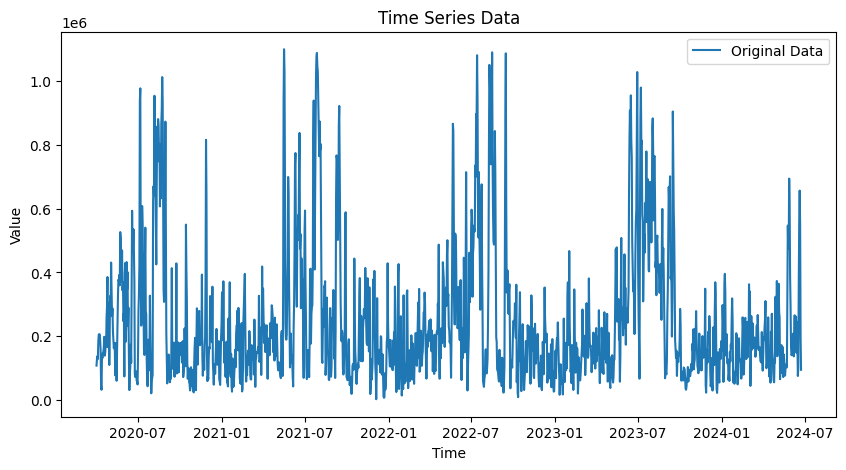

In [ ]:
#Plotting Chart
# Step 2: Plot the Data
plt.figure(figsize=(10, 5))
plt.plot(grouped_df['Gen.Units'], label='Original Data')
plt.title('Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
grouped_df = grouped_df.reset_index()
grouped_df.head()

,Log Date,Gen.Units,AVG WindSpd,WTG Fault,PM ShutDown,MMA,Grid Availability,Capacity Factor
0,2020-04-01,107889,3.858730,0.350000,0.0,99.976825,98.692698,8.920159
1,2020-04-02,127978,4.425397,7.883333,0.0,99.478571,99.456825,10.580318
2,2020-04-03,137558,4.720635,6.283333,0.0,99.584603,100.000000,11.372540
3,2020-04-04,128363,4.417460,5.333333,0.0,99.647143,100.000000,10.612381
4,2020-04-05,184724,5.073016,4.600000,0.0,99.695873,94.865079,15.271429


In [ ]:
grouped_df['Log Date'] = pd.to_datetime(grouped_df['Log Date'], format='%d/%m/%Y')

# Proceed with extracting month and year as shown above
grouped_df['Month'] = grouped_df['Log Date'].dt.month
grouped_df['Year'] = grouped_df['Log Date'].dt.year
grouped_df['Month_Year'] = grouped_df['Log Date'].dt.to_period('M')
grouped_df.head()

,Log Date,Gen.Units,AVG WindSpd,WTG Fault,PM ShutDown,MMA,Grid Availability,Capacity Factor,Month,Year,Month_Year
0,2020-04-01,107889,3.858730,0.350000,0.0,99.976825,98.692698,8.920159,4,2020,2020-04
1,2020-04-02,127978,4.425397,7.883333,0.0,99.478571,99.456825,10.580318,4,2020,2020-04
2,2020-04-03,137558,4.720635,6.283333,0.0,99.584603,100.000000,11.372540,4,2020,2020-04
3,2020-04-04,128363,4.417460,5.333333,0.0,99.647143,100.000000,10.612381,4,2020,2020-04
4,2020-04-05,184724,5.073016,4.600000,0.0,99.695873,94.865079,15.271429,4,2020,2020-04


In [ ]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1545 entries, 0 to 1544
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Log Date           1545 non-null   datetime64[ns]
 1   Gen.Units          1545 non-null   int64         
 2   AVG WindSpd        1545 non-null   float64       
 3   WTG Fault          1545 non-null   float64       
 4   PM ShutDown        1545 non-null   float64       
 5   MMA                1545 non-null   float64       
 6   Grid Availability  1545 non-null   float64       
 7   Capacity Factor    1545 non-null   float64       
 8   Month              1545 non-null   int32         
 9   Year               1545 non-null   int32         
 10  Month_Year         1545 non-null   period[M]     
dtypes: datetime64[ns](1), float64(6), int32(2), int64(1), period[M](1)
memory usage: 120.8 KB


In [ ]:
# Step 3: Set the 'Date' Column as the Index
grouped_df.set_index('Log Date', inplace=True)

In [ ]:
monthly_grouped = grouped_df.groupby('Month_Year').agg({'Gen.Units': 'sum', 'AVG WindSpd': 'mean', 'WTG Fault': 'sum', 'PM ShutDown': 'sum', 'MMA': 'mean', 'Grid Availability': 'mean', 'Capacity Factor': 'mean'})
monthly_grouped

,Gen.Units,AVG WindSpd,WTG Fault,PM ShutDown,MMA,Grid Availability,Capacity Factor
Month_Year,,,,,,,
2020-04,5239867,4.929524,213.450000,90.950000,99.328942,97.435397,14.439815
2020-05,9055621,6.198618,274.416667,307.516667,98.758495,94.431941,24.149995
2020-06,7413322,5.106402,444.716667,200.716667,98.577116,94.948899,20.429392
2020-07,9123785,5.673682,338.966667,82.416667,99.101004,98.490584,24.331818
2020-08,20562571,8.274040,325.350000,46.633333,99.155218,99.195991,54.837061
2020-09,4128381,4.466138,454.250000,38.550000,98.913577,99.192423,11.377101
2020-10,4171059,4.428264,486.383333,89.266667,98.771889,96.758218,11.123953
2020-11,6528634,5.213757,132.566667,77.133333,99.537730,99.616899,17.991280
2020-12,4806702,4.663390,136.533333,37.083333,99.629601,98.759995,12.819002


In [ ]:
monthly_grouped = monthly_grouped.reset_index()
monthly_grouped.head()

,Month_Year,Gen.Units,AVG WindSpd,WTG Fault,PM ShutDown,MMA,Grid Availability,Capacity Factor
0,2020-04,5239867,4.929524,213.450000,90.950000,99.328942,97.435397,14.439815
1,2020-05,9055621,6.198618,274.416667,307.516667,98.758495,94.431941,24.149995
2,2020-06,7413322,5.106402,444.716667,200.716667,98.577116,94.948899,20.429392
3,2020-07,9123785,5.673682,338.966667,82.416667,99.101004,98.490584,24.331818
4,2020-08,20562571,8.274040,325.350000,46.633333,99.155218,99.195991,54.837061


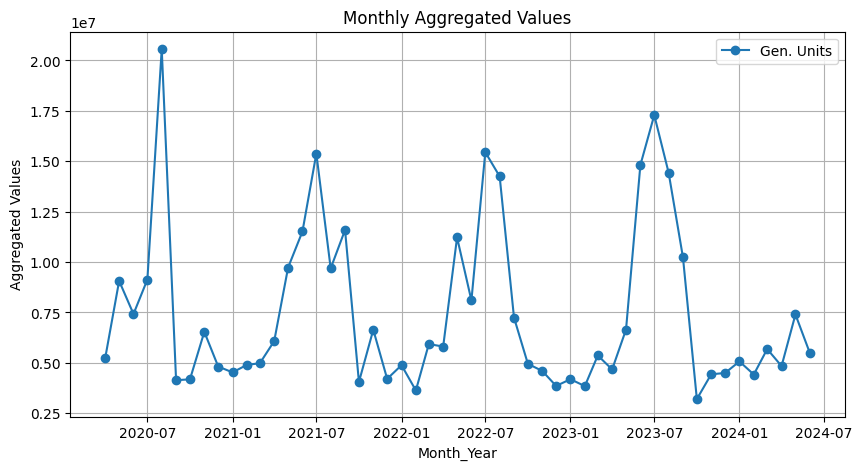

In [ ]:
plt.figure(figsize=(10, 5))
monthly_grouped = monthly_grouped.set_index('Month_Year')
# Plotting sum of 'Value' per month
plt.plot(monthly_grouped.index.to_timestamp(), monthly_grouped['Gen.Units'], label='Gen. Units', marker='o')
plt.title('Monthly Aggregated Values')
plt.xlabel('Month_Year')
plt.ylabel('Aggregated Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
monthly_grouped = monthly_grouped.reset_index()
monthly_grouped.head()

,Month_Year,Gen.Units,AVG WindSpd,WTG Fault,PM ShutDown,MMA,Grid Availability,Capacity Factor
0,2020-04,5239867,4.929524,213.450000,90.950000,99.328942,97.435397,14.439815
1,2020-05,9055621,6.198618,274.416667,307.516667,98.758495,94.431941,24.149995
2,2020-06,7413322,5.106402,444.716667,200.716667,98.577116,94.948899,20.429392
3,2020-07,9123785,5.673682,338.966667,82.416667,99.101004,98.490584,24.331818
4,2020-08,20562571,8.274040,325.350000,46.633333,99.155218,99.195991,54.837061


In [ ]:
# Adding '-01' to ensure the first day of the month
monthly_grouped['Month_Year'] = monthly_grouped['Month_Year'].astype(str)
monthly_grouped['Date'] = pd.to_datetime(monthly_grouped['Month_Year'] + '-01')

In [ ]:
monthly_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Month_Year         51 non-null     object        
 1   Gen.Units          51 non-null     int64         
 2   AVG WindSpd        51 non-null     float64       
 3   WTG Fault          51 non-null     float64       
 4   PM ShutDown        51 non-null     float64       
 5   MMA                51 non-null     float64       
 6   Grid Availability  51 non-null     float64       
 7   Capacity Factor    51 non-null     float64       
 8   Date               51 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 3.7+ KB


In [ ]:
monthly_grouped.head()

,Month_Year,Gen.Units,AVG WindSpd,WTG Fault,PM ShutDown,MMA,Grid Availability,Capacity Factor,Date
0,2020-04,5239867,4.929524,213.450000,90.950000,99.328942,97.435397,14.439815,2020-04-01
1,2020-05,9055621,6.198618,274.416667,307.516667,98.758495,94.431941,24.149995,2020-05-01
2,2020-06,7413322,5.106402,444.716667,200.716667,98.577116,94.948899,20.429392,2020-06-01
3,2020-07,9123785,5.673682,338.966667,82.416667,99.101004,98.490584,24.331818,2020-07-01
4,2020-08,20562571,8.274040,325.350000,46.633333,99.155218,99.195991,54.837061,2020-08-01


In [ ]:
monthly_grouped = monthly_grouped.set_index('Date')
monthly_grouped.head()

,Month_Year,Gen.Units,AVG WindSpd,WTG Fault,PM ShutDown,MMA,Grid Availability,Capacity Factor
Date,,,,,,,,
2020-04-01,2020-04,5239867,4.929524,213.450000,90.950000,99.328942,97.435397,14.439815
2020-05-01,2020-05,9055621,6.198618,274.416667,307.516667,98.758495,94.431941,24.149995
2020-06-01,2020-06,7413322,5.106402,444.716667,200.716667,98.577116,94.948899,20.429392
2020-07-01,2020-07,9123785,5.673682,338.966667,82.416667,99.101004,98.490584,24.331818
2020-08-01,2020-08,20562571,8.274040,325.350000,46.633333,99.155218,99.195991,54.837061


In [ ]:
gen_df = monthly_grouped[['Gen.Units']]
gen_df.head()

,Gen.Units
Date,
2020-04-01,5239867
2020-05-01,9055621
2020-06-01,7413322
2020-07-01,9123785
2020-08-01,20562571


In [ ]:
len(gen_df)

51

In [ ]:
train_gen = gen_df.iloc[:38]
test_gen = gen_df.iloc[38:]

In [ ]:
# Load specific forecasting tools
from statsmodels.tsa.ar_model import AutoReg,AutoRegResults
model = AutoReg(train_gen['Gen.Units'],lags=1)
AR1fit = model.fit()
print(AR1fit.summary())

                            AutoReg Model Results                             
Dep. Variable:              Gen.Units   No. Observations:                   38
Model:                     AutoReg(1)   Log Likelihood                -611.772
Method:               Conditional MLE   S.D. of innovations        3669017.976
Date:                Thu, 27 Jun 2024   AIC                           1229.544
Time:                        11:16:38   BIC                           1234.376
Sample:                    05-01-2020   HQIC                          1231.247
                         - 05-01-2023                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4.716e+06   1.27e+06      3.703      0.000    2.22e+06    7.21e+06
Gen.Units.L1     0.3638      0.153      2.385      0.017       0.065       0.663
                                    Roots   

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
start = len(train_gen)
end = len(train_gen) + len(test_gen) - 1
predictions = AR1fit.predict(start=start, end=end,dynamic=False).rename('AR(1) Predictions for Generation_Units_in_KWh')
predictions

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


2023-06-01    7.131789e+06
2023-07-01    7.310231e+06
2023-08-01    7.375145e+06
2023-09-01    7.398760e+06
2023-10-01    7.407351e+06
2023-11-01    7.410476e+06
2023-12-01    7.411613e+06
2024-01-01    7.412027e+06
2024-02-01    7.412177e+06
2024-03-01    7.412232e+06
2024-04-01    7.412252e+06
2024-05-01    7.412259e+06
2024-06-01    7.412262e+06
Freq: MS, Name: AR(1) Predictions for Generation_Units_in_KWh, dtype: float64

<Axes: xlabel='Date'>

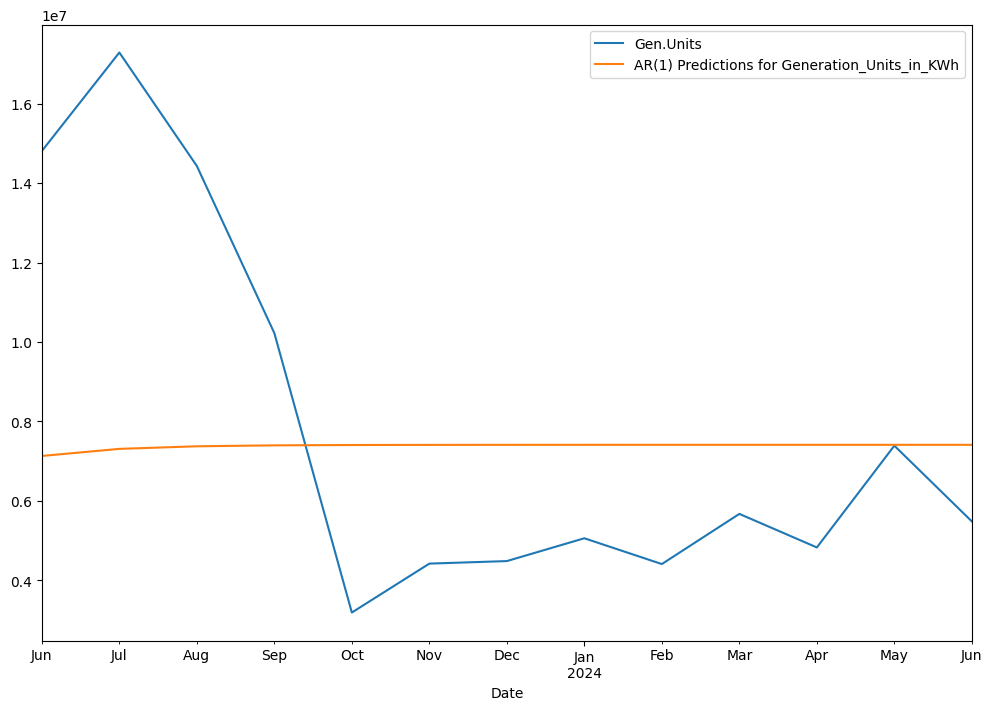

In [ ]:
test_gen.plot(figsize=(12,8),legend=True)
predictions.plot(figsize=(12,8),legend=True)

In [ ]:
# Comparing predictions to expected values
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<11.10}, expected={test_gen['Gen.Units'][i]}")

predicted=7131789.003, expected=14807132
predicted=7310230.929, expected=17286955
predicted=7375145.399, expected=14430542
predicted=7398760.299, expected=10223788
predicted=7407351.042, expected=3190894
predicted=7410476.224, expected=4422028
predicted=7411613.118, expected=4485921
predicted=7412026.703, expected=5060008
predicted=7412177.158, expected=4410788
predicted=7412231.892, expected=5673526
predicted=7412251.803, expected=4829151
predicted=7412259.047, expected=7390442
predicted=7412261.682, expected=5484460


In [ ]:
# Load specific forecasting tools
from statsmodels.tsa.ar_model import AutoReg,AutoRegResults
model2 = AutoReg(train_gen['Gen.Units'],lags=2)
AR2fit = model2.fit()
print(AR2fit.summary())

                            AutoReg Model Results                             
Dep. Variable:              Gen.Units   No. Observations:                   38
Model:                     AutoReg(2)   Log Likelihood                -595.383
Method:               Conditional MLE   S.D. of innovations        3683862.355
Date:                Thu, 27 Jun 2024   AIC                           1198.766
Time:                        11:18:46   BIC                           1205.100
Sample:                    06-01-2020   HQIC                          1200.976
                         - 05-01-2023                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4.188e+06   1.51e+06      2.768      0.006    1.22e+06    7.15e+06
Gen.Units.L1     0.3429      0.165      2.077      0.038       0.019       0.666
Gen.Units.L2     0.0828      0.165      0.50

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
start = len(train_gen)
end = len(train_gen) + len(test_gen) - 1
predictions2 = AR2fit.predict(start=start, end=end,dynamic=False).rename('AR(2) Predictions for Generation_Units_in_KWh')
predictions2

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


2023-06-01    6.851353e+06
2023-07-01    7.087204e+06
2023-08-01    7.185477e+06
2023-09-01    7.238703e+06
2023-10-01    7.265092e+06
2023-11-01    7.278548e+06
2023-12-01    7.285348e+06
2024-01-01    7.288793e+06
2024-02-01    7.290538e+06
2024-03-01    7.291421e+06
2024-04-01    7.291869e+06
2024-05-01    7.292095e+06
2024-06-01    7.292210e+06
Freq: MS, Name: AR(2) Predictions for Generation_Units_in_KWh, dtype: float64

<Axes: xlabel='Date'>

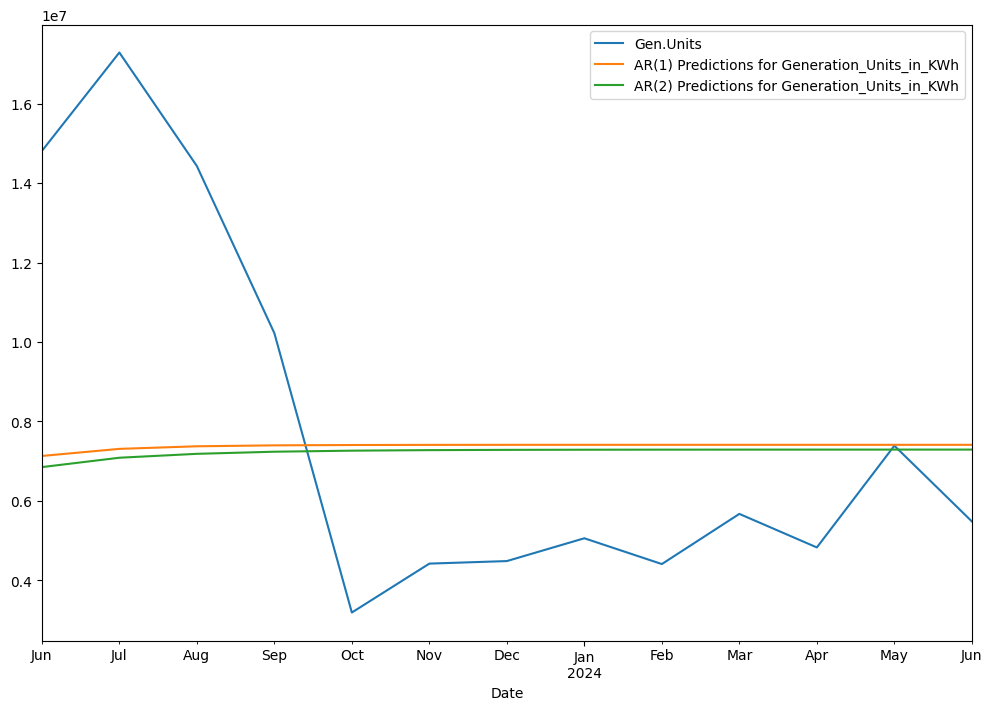

In [ ]:
test_gen.plot(figsize=(12,8),legend=True)
predictions.plot(figsize=(12,8),legend=True)
predictions2.plot(figsize=(12,8),legend=True)

In [ ]:
#findin out te optimal lag for an AR model

from statsmodels.tsa.ar_model import AutoReg, ar_select_order
def select_optimal_lag(df, column_name, max_lags=10, ic='aic'):
    """
    Function to select the optimal lag length for an AR model using ar_select_order.

    Parameters:
    - df: pandas DataFrame containing the time series data.
    - column_name: str, name of the column to model.
    - max_lags: int, maximum number of lags to consider.
    - ic: str, information criterion to use ('aic', 'bic', 'hqic').

    Returns:
    - best_lag: int, the optimal number of lags based on the criterion.
    """
    y = df[column_name]

    # Use ar_select_order to automatically select the optimal lag length
    sel = ar_select_order(y, maxlag=max_lags, ic=ic)

    # Return the optimal lag length
    return sel.ar_lags[0]

# Example usage: Select optimal lag length based on AIC
optimal_lag = select_optimal_lag(train_gen, 'Gen.Units', max_lags=10, ic='aic')
print(f"Optimal lag length based on AIC: {optimal_lag}")

Optimal lag length based on AIC: 1


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
